<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/articulos/Gradient_Descent_for_Linear_Regression_Part_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent for Linear Regression. Part 1/2**
#### **Understanding the Algorithm and Basic Implementation**

<a href="https://github.com/magnitopic" target="_blank"><img src="https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white" alt="GitHub" style="display: inline-block; vertical-align: middle; margin-right: 10px;"/></a><a href="https://www.kaggle.com/magnitopic" target="_blank"><img src="https://img.shields.io/badge/Kaggle-20BEFF?style=flat&logo=kaggle&logoColor=white" alt="Kaggle" style="display: inline-block; vertical-align: middle; margin-right: 10px;"/></a><a href="https://www.linkedin.com/in/magnitopic" target="_blank"><img src="https://img.shields.io/badge/LinkedIn-0A66C2?style=flat&logo=linkedin&logoColor=white" alt="LinkedIn" style="display: inline-block; vertical-align: middle; margin-right: 10px;"/></a>

> **Esta es la Parte 1 de 2 en nuestra serie sobre Gradient Descent.**
> Aquí aprenderás la intuición, las matemáticas esenciales y la implementación básica del algoritmo. Para dominar los hiperparámetros, el escalado de características y las implementaciones profesionales, asegúrate de visitar la Parte 2 después de completar este notebook.

El Descenso del Gradiente es el motor de optimización detrás de prácticamente todo el Machine Learning moderno. En este artículo, aprenderás cómo funciona este algoritmo aplicándolo a la Regresión Lineal, combinando teoría accesible con código práctico para que entiendas **por qué funciona** y **cómo implementarlo** paso a paso.

Al final de este artículo, habrás construido tu propio algoritmo de Gradient Descent desde cero y entenderás la base sobre la que se construyen las redes neuronales.

---

## **1. Introducción: ¿Qué problema queremos resolver?**

En el corazón del Machine Learning y la Ciencia de Datos se encuentra una tarea fundamental: la **optimización**. Queremos encontrar los mejores parámetros posibles para que nuestro modelo haga predicciones precisas.

Empecemos con un ejemplo clásico y concreto: **predecir el precio de una vivienda basándonos en su tamaño.**

### El problema de predicción

Imagina que tenemos un conjunto de datos de casas. Para cada casa, conocemos su tamaño en metros cuadrados (nuestra variable $x$) y el precio final por el que se vendió (nuestra variable $y$). Si visualizamos estos datos en un gráfico, probablemente veremos una "nube de puntos" que tiende a ir hacia arriba: a más metros cuadrados, mayor es el precio.

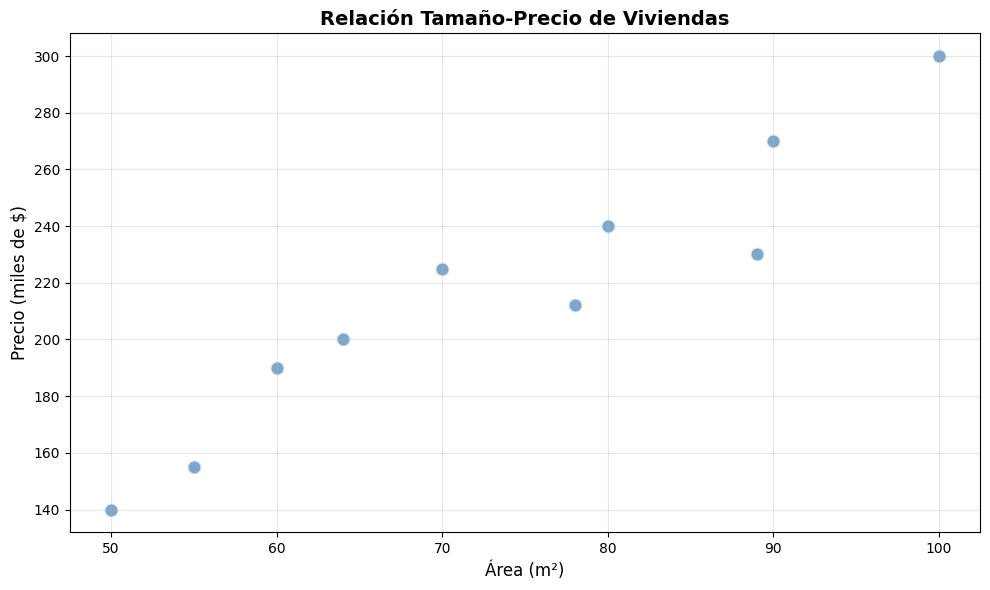

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de viviendas vs precio
area = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([140000, 155000, 190000, 200000, 225000,
                  212000, 240000, 230000, 270000, 300000])

plt.figure(figsize=(10, 6))
plt.scatter(area, precio/1000, alpha=0.7, s=100, color='steelblue', edgecolors='white', linewidth=1.5)
plt.xlabel('Área (m²)', fontsize=12)
plt.ylabel('Precio (miles de $)', fontsize=12)
plt.title('Relación Tamaño-Precio de Viviendas', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Nuestro objetivo es trazar **una línea recta** que represente de la mejor forma posible la tendencia de esos puntos. Esta línea será nuestro "modelo" de Regresión Lineal. ¿Por qué? Porque una vez que tengamos esa línea, si alguien nos da un nuevo tamaño ($x$) de una casa que no estaba en nuestros datos, podremos "consultar" la línea para estimar su precio ($y$).

### La ecuación de nuestro modelo

Como recordarás de tus clases de matemáticas, la ecuación de una línea recta es $y = b + mx$. En Machine Learning, usamos una notación ligeramente diferente pero que significa exactamente lo mismo:

$$\hat{y} = w_0 + w_1 x$$

Vamos a analizar estos términos, ya que los usaremos durante todo el artículo:

* **$x$**: Es nuestra variable de entrada (el *feature*), en este caso, el tamaño de la casa.
* **$\hat{y}$** (se pronuncia "y-sombrero" o "y-gorro"): Es la **predicción** de nuestro modelo (el precio estimado). La distinguimos de la $y$ real (el precio de venta verdadero).
* **$w_0$**: Es el **sesgo** (del inglés *bias* o *intercept*). Es la ordenada en el origen. Representa el precio base que tendría nuestra predicción si $x$ fuera 0.
* **$w_1$**: Es el **peso** (del inglés *weight*). Es equivalente a la pendiente. Nos dice cuánto cambia $\hat{y}$ (precio) por cada unidad que aumenta $x$ (metro cuadrado).

**Nuestro objetivo:** Encontrar los valores de $w_0$ y $w_1$ que nos den la recta que mejor se ajuste a la nube de puntos.

### La pregunta fundamental: ¿Cómo encontramos los mejores parámetros?

De todas las rectas posibles (infinitas combinaciones de $w_0$ y $w_1$), ¿cómo encontramos la que **"mejor se ajusta"** a los datos? ¿Qué significa "la mejor"?

**Hay dos enfoques principales para resolver este problema:**

#### 1. **La Solución Cerrada (Normal Equation)**
Existe una fórmula matemática directa que calcula los parámetros óptimos en un solo paso:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Esta fórmula es exacta, rápida para datasets pequeños, y la aprendiste en detalle en nuestro artículo anterior sobre [Linear Regression from Scratch - Part 1](https://www.kaggle.com/code/magnitopic/linear-regression-from-scratch-in-python-part-1-2).

**Ventajas:**
- Solución exacta en una sola operación
- No requiere ajustar hiperparámetros
- Perfecta para datasets pequeños y medianos

**Limitaciones:**
- Requiere invertir una matriz, operación de complejidad $O(n^3)$
- Computacionalmente prohibitiva para datasets con millones de filas o miles de características
- Requiere cargar todos los datos en memoria
- No funciona si la matriz $\mathbf{X}^T \mathbf{X}$ es singular (no invertible)

#### 2. **El Descenso del Gradiente (Gradient Descent)**
Un algoritmo iterativo que "busca" los mejores parámetros mediante pasos sucesivos, mejorando gradualmente la solución.

**Ventajas:**
- Escala a datasets de cualquier tamaño (millones de filas, miles de características)
- Funciona con datos que no caben en memoria (procesamiento por lotes)
- Es la base de prácticamente todo el Deep Learning
- Permite actualización continua del modelo (online learning)
- Funciona para problemas no lineales y redes neuronales

**¿Cuándo necesitamos Gradient Descent?**

| Situación | Solución Cerrada | Gradient Descent |
|:----------|:-----------------|:-----------------|
| < 10,000 filas, < 100 características | ↑↑ Óptimo | ~ Funciona pero innecesario |
| 10,000 - 100,000 filas | ↑ Funciona | ↑ Buena opción |
| > 100,000 filas o > 1,000 características | ↓ Muy lento/inestable | ↑↑ **Necesario** |
| Datos que no caben en RAM | ✗ Imposible | ↑↑ **Única opción** |
| Redes Neuronales | ✗ No aplicable | ↑↑ **Única opción** |
| Necesitas online learning | ✗ No aplicable | ↑↑ **Única opción** |

### ¿Por qué aprender Gradient Descent si existe la solución cerrada?

Esta es una pregunta legítima. La respuesta tiene tres partes:

**1. Escalabilidad real:** Los problemas del mundo real suelen tener cientos de miles o millones de observaciones. En estos casos, la solución cerrada simplemente no es viable.

**2. Fundamento del Deep Learning:** Cada red neuronal que existe (desde modelos de visión por computadora hasta GPT) utiliza alguna variante del Gradient Descent. No puedes entender Deep Learning sin entender Gradient Descent.

**3. Generalidad:** Gradient Descent funciona para optimizar prácticamente cualquier función diferenciable. La solución cerrada solo existe para unos pocos problemas específicos (como la regresión lineal con MSE).

### ¿Qué aprenderás en este notebook?

Al completar este artículo, serás capaz de:

- Entender la **intuición geométrica** del Gradient Descent (sin matemáticas complejas)
- Comprender las **matemáticas esenciales**: qué es el gradiente y por qué "descender" funciona
- **Implementar el algoritmo desde cero** en Python con NumPy
- **Visualizar el proceso de optimización** y entender qué está pasando internamente
- Reconocer cuándo usar Gradient Descent vs la solución cerrada

En la **Parte 2**, llevaremos este conocimiento al siguiente nivel: dominarás los hiperparámetros críticos (learning rate), entenderás por qué el escalado de características es esencial, compararás tu implementación con scikit-learn, y extenderás el algoritmo a múltiples variables.

Pero primero, necesitamos responder una pregunta fundamental: ¿cómo medimos qué tan "buena" o "mala" es una línea? Para eso, necesitamos una **Función de Costes**.

---

## **2. Midiendo el Error: La Función de Costes**

En la sección anterior, nos quedamos con una pregunta clave: ¿cómo definimos la "mejor" línea?

Intuitivamente, la mejor línea será aquella que esté **lo más cerca posible de todos los puntos de datos** al mismo tiempo. Necesitamos una forma de cuantificar esta "cercanía" total. Esta medida es lo que llamamos la **Función de Costes** (o *Cost Function*).

### El Residuo: El Error de un Solo Punto

Primero, veamos el error para un solo punto. Digamos que tenemos una casa (nuestro punto $i$-ésimo) que mide $x_i$ metros cuadrados y se vendió por un precio real $y_i$.

Si nuestra línea (definida por $w_0$ y $w_1$) predice un precio $\hat{y}_i$ para esa casa, el error para *ese punto* es simplemente la diferencia vertical entre el valor real y el valor predicho.

$$\text{Error}_i = e_i = y_i - \hat{y}_i$$

A esta diferencia la llamamos **"residuo"**.

* Si el punto real está **por encima** de la línea ($y_i > \hat{y}_i$), el residuo $e_i$ es **positivo**.
* Si el punto real está **por debajo** de la línea ($y_i < \hat{y}_i$), el residuo $e_i$ es **negativo**.

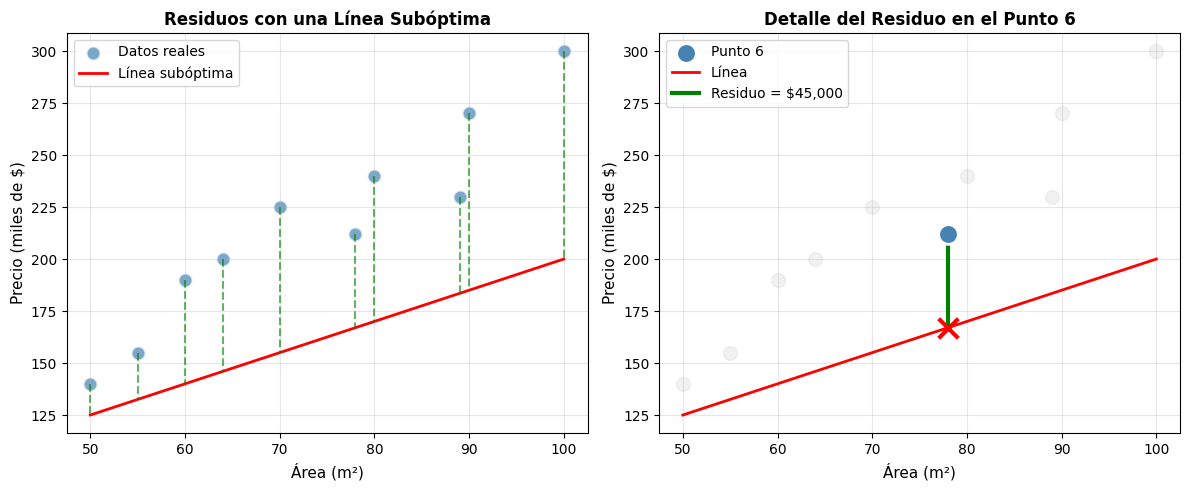

Para el punto 6:
  Área: 78 m²
  Precio real (y): $212,000
  Precio predicho (ŷ): $167,000
  Residuo (e = y - ŷ): $45,000


In [3]:
# Visualización de residuos con una línea arbitraria
plt.figure(figsize=(12, 5))

# Subplot 1: Línea con pendiente incorrecta (demasiado baja)
plt.subplot(1, 2, 1)
w0_bad, w1_bad = 50000, 1500  # Parámetros subóptimos
y_pred_bad = w0_bad + w1_bad * area

plt.scatter(area, precio/1000, alpha=0.7, s=100, color='steelblue',
            edgecolors='white', linewidth=1.5, label='Datos reales')
plt.plot(area, y_pred_bad/1000, 'r-', linewidth=2, label='Línea subóptima')

# Dibujar residuos
for i in range(len(area)):
    plt.plot([area[i], area[i]], [precio[i]/1000, y_pred_bad[i]/1000],
             'g--', alpha=0.6, linewidth=1.5)

plt.xlabel('Área (m²)', fontsize=11)
plt.ylabel('Precio (miles de $)', fontsize=11)
plt.title('Residuos con una Línea Subóptima', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Destacar un residuo específico
plt.subplot(1, 2, 2)
idx = 5  # Sexto punto
xi, yi = area[idx], precio[idx]
yi_pred = w0_bad + w1_bad * xi
residuo = yi - yi_pred

plt.scatter(area, precio/1000, alpha=0.3, s=100, color='lightgray')
plt.scatter(xi, yi/1000, s=200, color='steelblue', edgecolors='white',
            linewidth=2, label=f'Punto {idx+1}', zorder=5)
plt.plot(area, y_pred_bad/1000, 'r-', linewidth=2, label='Línea')
plt.plot([xi, xi], [yi/1000, yi_pred/1000], 'g-', linewidth=3,
         label=f'Residuo = ${residuo:,.0f}')
plt.scatter(xi, yi_pred/1000, s=200, color='red', marker='x', linewidth=3, zorder=5)

plt.xlabel('Área (m²)', fontsize=11)
plt.ylabel('Precio (miles de $)', fontsize=11)
plt.title(f'Detalle del Residuo en el Punto {idx+1}', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Para el punto {idx+1}:")
print(f"  Área: {xi} m²")
print(f"  Precio real (y): ${yi:,.0f}")
print(f"  Precio predicho (ŷ): ${yi_pred:,.0f}")
print(f"  Residuo (e = y - ŷ): ${residuo:,.0f}")

### Agregando el Error: El Error Cuadrático Medio (MSE)

Ahora, ¿cómo combinamos los residuos de *todos* nuestros puntos ($m$ puntos en total) en una sola métrica?

El primer impulso sería simplemente sumarlos. Pero esto es una **mala idea**: un residuo de +\\$50,000 y otro de -\\$50,000 se cancelarían mutuamente, haciendo parecer que nuestro modelo no tiene error, ¡cuando en realidad está fallando estrepitosamente en ambos puntos!

Para solucionar esto, hacemos dos cosas:

**1. Elevamos cada residuo al cuadrado:** $e_i^2 = (y_i - \hat{y}_i)^2$

Esto tiene dos ventajas clave:
* **Convierte todos los errores en números positivos** (ej. $(-50000)^2 = 2.5 \times 10^9$ y $(+50000)^2 = 2.5 \times 10^9$). ¡Se acabaron las cancelaciones!
* **Penaliza los errores grandes mucho más** que los pequeños. Un error de \\$10,000 se convierte en 100,000,000, pero un error de \\$2,000 solo se convierte en 4,000,000. Esto fuerza al modelo a evitar predicciones muy alejadas de la realidad.

**2. Calculamos la media:** Sumamos todos estos errores al cuadrado y los dividimos por el número de puntos ($m$). Esto nos da el **Error Cuadrático Medio** (o *Mean Squared Error*, MSE).

Esta métrica es nuestra **Función de Costes**, que comúnmente se denota como $J$:

$$J(w_0, w_1) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

Si sustituimos $\hat{y}_i$ por la ecuación de nuestra línea, $(\hat{y}_i = w_0 + w_1 x_i)$, obtenemos la fórmula completa:

$$J(w_0, w_1) = \frac{1}{m} \sum_{i=1}^{m} (y_i - (w_0 + w_1 x_i))^2$$

> **Nota técnica:** En muchos libros verás esta fórmula con un $\frac{1}{2m}$ en lugar de $\frac{1}{m}$ (es decir, $J = \frac{1}{2m} \sum...$). Este $\frac{1}{2}$ se añade por pura conveniencia matemática: al derivar $(y - \hat{y})^2$ obtenemos $2(y - \hat{y})$, y el factor $\frac{1}{2}$ cancela ese 2, simplificando las ecuaciones del gradiente. **Esto no cambia dónde está el mínimo de la función**, solo hace los cálculos más limpios. En este artículo usaremos $\frac{1}{m}$ para mantener la interpretación directa como "promedio".

In [4]:
# Función para calcular el MSE
def calcular_mse(w0, w1, x, y):
    """Calcula el Error Cuadrático Medio"""
    m = len(y)
    y_pred = w0 + w1 * x
    mse = (1/m) * np.sum((y - y_pred)**2)
    return mse

# Calculamos el MSE para nuestra línea subóptima
mse_bad = calcular_mse(w0_bad, w1_bad, area, precio)

print(f"Parámetros de la línea subóptima:")
print(f"  w₀ = ${w0_bad:,.0f}")
print(f"  w₁ = ${w1_bad:,.0f}/m²")
print(f"\nError Cuadrático Medio (MSE): {mse_bad:,.0f}")
print(f"RMSE (raíz del MSE): ${np.sqrt(mse_bad):,.0f}")
print(f"\nInterpretación: En promedio, nuestras predicciones se desvían")
print(f"aproximadamente ${np.sqrt(mse_bad):,.0f} del precio real.")

Parámetros de la línea subóptima:
  w₀ = $50,000
  w₁ = $1,500/m²

Error Cuadrático Medio (MSE): $3,735,950,000²
RMSE (raíz del MSE): $61,122

Interpretación: En promedio, nuestras predicciones se desvían
aproximadamente $61,122 del precio real.


### Nuestro Nuevo Objetivo: Minimizar la Función de Costes

¡Este es el punto clave! Fíjate en $J(w_0, w_1)$. Nuestros datos ($x$ e $y$) son fijos. Por lo tanto, el coste $J$ **no es una función de $x$**, sino una **función de nuestros parámetros** $w_0$ y $w_1$.

* Diferentes valores de $w_0$ y $w_1$ (diferentes líneas) nos darán un coste $J$ diferente.
* Una línea mala tendrá un coste $J$ muy alto.
* Una línea buena tendrá un coste $J$ muy bajo.
* **La línea perfecta** minimizará $J$.

Si imaginamos todos los posibles valores de $w_0$ y $w_1$ y el coste $J$ que producen, obtendríamos una **superficie en 3D con forma de "cuenco" o valle**.

### Visualización: La Superficie de Costes en 3D

Veamos cómo se ve esta superficie de error para nuestro problema:

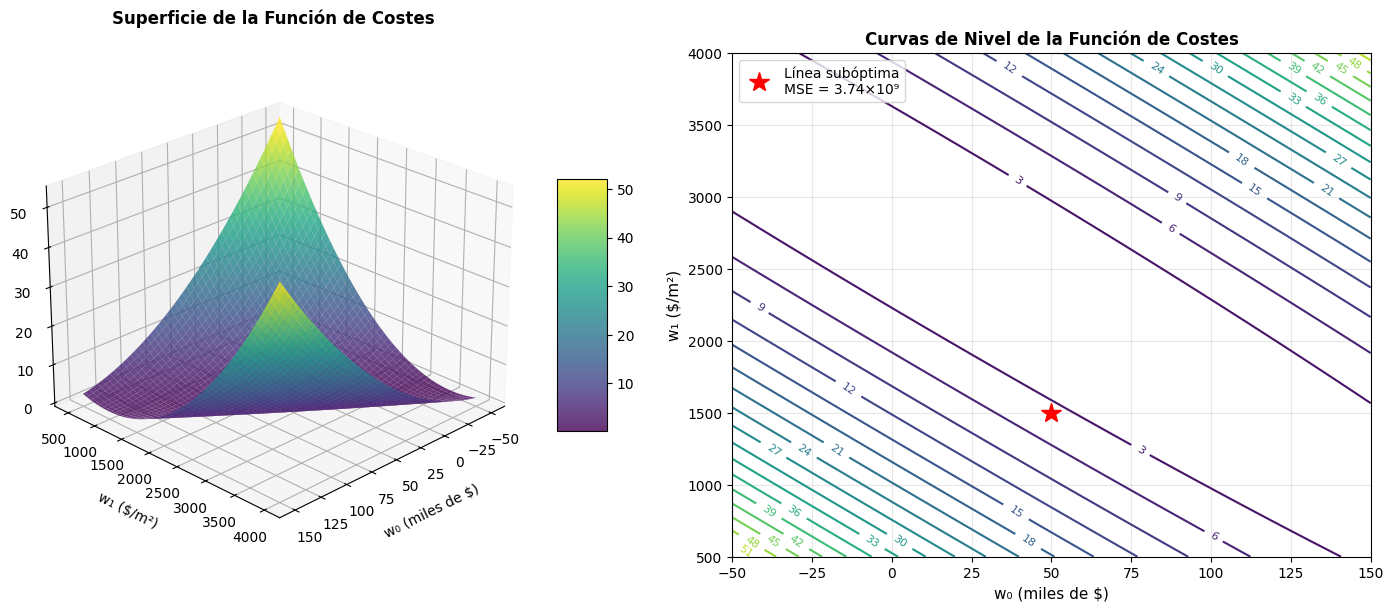

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una rejilla de valores para w0 y w1
w0_vals = np.linspace(-50000, 150000, 100)
w1_vals = np.linspace(500, 4000, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Calcular el MSE para cada combinación de w0 y w1
J = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        J[j, i] = calcular_mse(W0[j, i], W1[j, i], area, precio)

# Crear el gráfico 3D
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Vista 3D de la superficie
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W0/1000, W1, J/1e9, cmap='viridis', alpha=0.8,
                        edgecolor='none', antialiased=True)
ax1.set_xlabel('\nw₀ (miles de $)', fontsize=10)
ax1.set_ylabel('\nw₁ ($/m²)', fontsize=10)
ax1.set_zlabel('\nMSE (×10⁹)', fontsize=10)
ax1.set_title('Superficie de la Función de Costes\n', fontsize=12, fontweight='bold')
ax1.view_init(elev=25, azim=45)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Subplot 2: Vista de contorno (curvas de nivel)
ax2 = fig.add_subplot(122)
contour = ax2.contour(W0/1000, W1, J/1e9, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('w₀ (miles de $)', fontsize=11)
ax2.set_ylabel('w₁ ($/m²)', fontsize=11)
ax2.set_title('Curvas de Nivel de la Función de Costes', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Marcar el punto de la línea subóptima
ax2.plot(w0_bad/1000, w1_bad, 'r*', markersize=15,
         label=f'Línea subóptima\nMSE = {mse_bad/1e9:.2f}×10⁹')
ax2.legend()

plt.tight_layout()
plt.show()

**¿Qué nos muestra este gráfico?**

* **Superficie en forma de cuenco:** La función de costes tiene un único mínimo global (el punto más bajo del valle).
* **Curvas de nivel:** Cada línea en el gráfico de contorno representa combinaciones de $w_0$ y $w_1$ que producen el mismo error.
* **El punto rojo:** Nuestra línea subóptima está lejos del mínimo, en una zona de error alto.
* **El objetivo:** Queremos llegar al fondo del cuenco, donde $J$ es mínimo.

### La transformación del problema

Nuestro problema de "encontrar la mejor línea" se ha transformado en un **problema de optimización** mucho más claro:

> **Encontrar los valores de $w_0$ y $w_1$ que nos sitúen en el punto más bajo (el mínimo) de este cuenco.**

En términos matemáticos:

$$\min_{w_0, w_1} J(w_0, w_1) = \min_{w_0, w_1} \frac{1}{m} \sum_{i=1}^{m} (y_i - (w_0 + w_1 x_i))^2$$

**¿Cómo llegamos hasta allí?** Ahí es donde entra el **Descenso del Gradiente**.

En lugar de calcular directamente el mínimo (como hace la solución cerrada), el Descenso del Gradiente nos permite "caminar" por esta superficie, dando pasos calculados que nos llevan gradualmente hacia el fondo del valle.

En la siguiente sección, desarrollaremos la intuición de cómo funciona este "caminar inteligente" por la superficie de error.

---